In [1]:
# libraries
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Online news popularity

In [2]:
# 0. url: URL of the article (non-predictive)
# 1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
# 2. n_tokens_title: Number of words in the title
# 3. n_tokens_content: Number of words in the content
# 4. n_unique_tokens: Rate of unique words in the content
# 5. n_non_stop_words: Rate of non-stop words in the content
# 6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
# 7. num_hrefs: Number of links
# 8. num_self_hrefs: Number of links to other articles published by Mashable
# 9. num_imgs: Number of images
# 10. num_videos: Number of videos
# 11. average_token_length: Average length of the words in the content
# 12. num_keywords: Number of keywords in the metadata
# 13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
# 14. data_channel_is_entertainment: Is data channel 'Entertainment'?
# 15. data_channel_is_bus: Is data channel 'Business'?
# 16. data_channel_is_socmed: Is data channel 'Social Media'?
# 17. data_channel_is_tech: Is data channel 'Tech'?
# 18. data_channel_is_world: Is data channel 'World'?
# 19. kw_min_min: Worst keyword (min. shares)
# 20. kw_max_min: Worst keyword (max. shares)
# 21. kw_avg_min: Worst keyword (avg. shares)
# 22. kw_min_max: Best keyword (min. shares)
# 23. kw_max_max: Best keyword (max. shares)
# 24. kw_avg_max: Best keyword (avg. shares)
# 25. kw_min_avg: Avg. keyword (min. shares)
# 26. kw_max_avg: Avg. keyword (max. shares)
# 27. kw_avg_avg: Avg. keyword (avg. shares)
# 28. self_reference_min_shares: Min. shares of referenced articles in Mashable
# 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
# 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
# 31. weekday_is_monday: Was the article published on a Monday?
# 32. weekday_is_tuesday: Was the article published on a Tuesday?
# 33. weekday_is_wednesday: Was the article published on a Wednesday?
# 34. weekday_is_thursday: Was the article published on a Thursday?
# 35. weekday_is_friday: Was the article published on a Friday?
# 36. weekday_is_saturday: Was the article published on a Saturday?
# 37. weekday_is_sunday: Was the article published on a Sunday?
# 38. is_weekend: Was the article published on the weekend?
# 39. LDA_00: Closeness to LDA topic 0
# 40. LDA_01: Closeness to LDA topic 1
# 41. LDA_02: Closeness to LDA topic 2
# 42. LDA_03: Closeness to LDA topic 3
# 43. LDA_04: Closeness to LDA topic 4
# 44. global_subjectivity: Text subjectivity
# 45. global_sentiment_polarity: Text sentiment polarity
# 46. global_rate_positive_words: Rate of positive words in the content
# 47. global_rate_negative_words: Rate of negative words in the content
# 48. rate_positive_words: Rate of positive words among non-neutral tokens
# 49. rate_negative_words: Rate of negative words among non-neutral tokens
# 50. avg_positive_polarity: Avg. polarity of positive words
# 51. min_positive_polarity: Min. polarity of positive words
# 52. max_positive_polarity: Max. polarity of positive words
# 53. avg_negative_polarity: Avg. polarity of negative words
# 54. min_negative_polarity: Min. polarity of negative words
# 55. max_negative_polarity: Max. polarity of negative words
# 56. title_subjectivity: Title subjectivity
# 57. title_sentiment_polarity: Title polarity
# 58. abs_title_subjectivity: Absolute subjectivity level
# 59. abs_title_sentiment_polarity: Absolute polarity level
# 60. shares: Number of shares (target)

In [3]:
df = pd.read_csv('online-news.csv',sep = ',')

'''
cols = ['url',' timedelta',' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',
        ' n_non_stop_unique_tokens',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',
        ' num_keywords' ' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',
        ' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',' kw_min_min',' kw_max_min',
        ' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',
        ' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' weekday_is_monday',
        ' weekday_is_tuesday',' weekday_is_wednesday' ' weekday_is_thursday',' weekday_is_friday',
        ' weekday_is_saturday',' weekday_is_sunday',' is_weekend',' LDA_00',' LDA_01',' LDA_02',' LDA_03',
        ' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',
        ' global_rate_negative_words',' rate_positive_words',' rate_negative_words',' avg_positive_polarity',
        ' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',' min_negative_polarity',
        ' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',
        ' abs_title_sentiment_polarity',' shares']
        
        
df.columns = cols
'''

df[" weekday_is_monday"] = df[" weekday_is_monday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_tuesday"] = df[" weekday_is_tuesday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_wednesday"] = df[" weekday_is_wednesday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_thursday"] = df[" weekday_is_thursday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_friday"] = df[" weekday_is_friday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_saturday"] = df[" weekday_is_saturday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" weekday_is_sunday"] = df[" weekday_is_sunday"].apply(lambda x: 1 if x == "1.0" else 0)
df[" is_weekend"] = df[" weekday_is_sunday"].apply(lambda x: 1 if x == "1.0" else 0)

df[" data_channel_is_lifestyle"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)
df[" data_channel_is_entertainment"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)
df[" data_channel_is_bus"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)
df[" data_channel_is_socmed"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)
df[" data_channel_is_tech"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)
df[" data_channel_is_world"] = df[" data_channel_is_lifestyle"].apply(lambda x: 1 if x == "1.0" else 0)


drop_cols = [' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg',]
df = df.drop(columns=drop_cols, axis=1)

pd.set_option('display.max_columns', None)

df.info()
df = df.drop(range(200,39644))
df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,0.0,4.855670,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.458250,0.028979,0.028662,0.029696,0.454412,0.538889,0.161111,0.030928,0.020619,0.600000,0.400000,0.566667,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashabl

In [4]:
# Break dataset into train and test data

share_index = list(df.columns).index(" shares")
train_cols = list(df.columns[1:share_index]) + list(df.columns[share_index+1:])
label = df.columns[share_index]
X_df = df[list(train_cols)]
y_df = df[label]

print(y_df)

0       593
1       711
2      1500
3      1200
4       505
       ... 
195     676
196    2900
197    2500
198    1400
199     484
Name:  shares, Length: 200, dtype: int64


In [5]:
dataset = {
        'X': X_df,
        'y': y_df,
}

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

In [6]:
y_df = y_df.apply(lambda x: "low" if x < 1000.0 else ("med" if x <=2000.0 else "high"))
print(y_df)

0       low
1       low
2       med
3       med
4       low
       ... 
195     low
196    high
197    high
198     med
199     low
Name:  shares, Length: 200, dtype: object


## SVM

In [7]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
#Training accuracy
train_pred = clf.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = clf.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.98
The accuracy of the model on the test set is:  0.06


<AxesSubplot:>

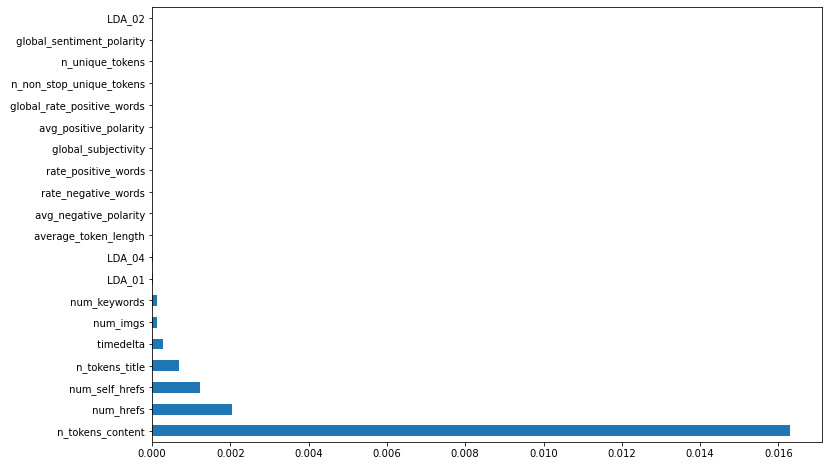

In [9]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(clf.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)

In [11]:
#Training accuracy
train_pred = lr.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = lr.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.73333
The accuracy of the model on the test set is:  0.04


<AxesSubplot:>

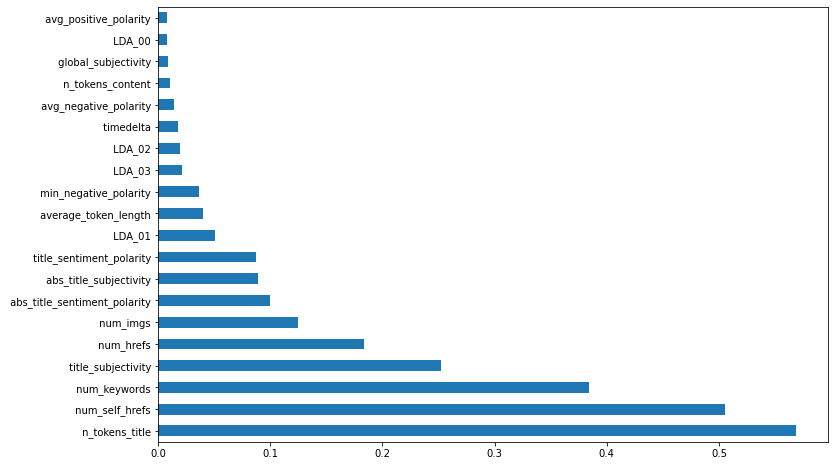

In [12]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(lr.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Decision Tree

In [13]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [14]:
#Training accuracy
train_pred = dtree.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = dtree.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  1.0
The accuracy of the model on the test set is:  0.0


<AxesSubplot:>

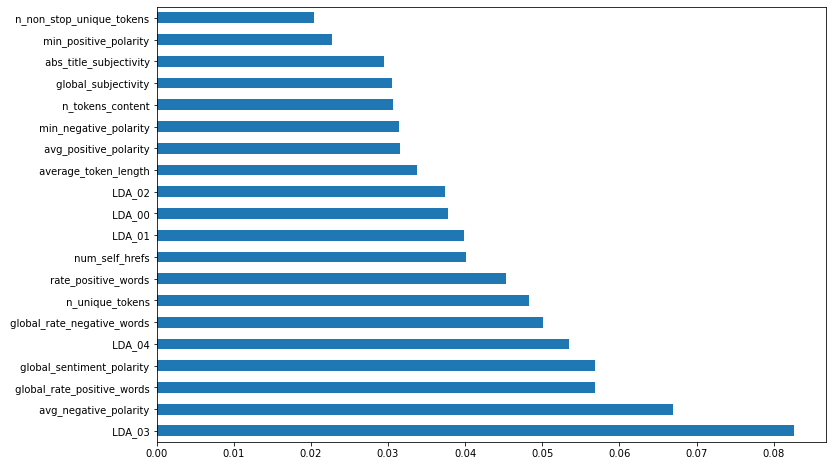

In [15]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(dtree.feature_importances_), index=dataset['X'].columns).nlargest(20).plot(kind='barh')


## GAMs

In [16]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split


# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/glassbox/ebm/ebm.py:922: UserWarning: Multiclass is still experimental. Subject to change per release.
  warn("Multiclass is still experimental. Subject to change per release.")
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/glassbox/ebm/ebm.py:925: UserWarning: Detected multiclass problem: forcing interactions to 0
  warn("Detected multiclass problem: forcing interactions to 0")


ExplainableBoostingClassifier(feature_names=[' timedelta', ' n_tokens_title',
                                             ' n_tokens_content',
                                             ' n_unique_tokens',
                                             ' n_non_stop_words',
                                             ' n_non_stop_unique_tokens',
                                             ' num_hrefs', ' num_self_hrefs',
                                             ' num_imgs', ' num_videos',
                                             ' average_token_length',
                                             ' num_keywords',
                                             ' data_channel_is_lifestyle',
                                             ' data_channel_is_entertainment',
                                             ' data_channel_is_bus',
                                             ' data_channel_is_soc...
                                             'continuous', 'continuous',
  

In [17]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7197/140526537321680/ -->

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt
